In [1]:
using Plots,StatsBase
N=1e5




100000.0

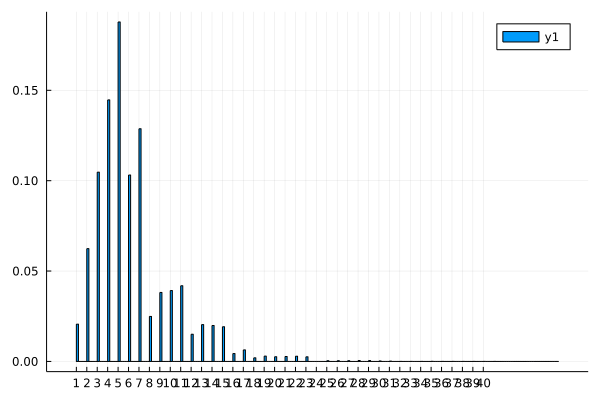

Any[0.62537, 0.75148, 0.8121800000000001, 0.85048, 0.87398]
Any[0.19222, 0.25673000000000007, 0.24781000000000003, 0.39919, 0.4967299999999999]
Any[0.04246, 0.02745, 0.02063, 0.0167, 0.01401]


In [7]:
die = [4,6,8,10,12]

psuccess=[];raise=[];critical=[];psuccessminustwo=[]

for j in die

    result=[]

    for i=1:N

        rolldie=[rand(1:j)]; rollwildcard=[rand(1:6)]

        if rolldie[1]==j push!(rolldie,rand(1:j)) end
        if rollwildcard[1]==6 push!(rollwildcard,rand(1:6)) end

        while last(rolldie)==j push!(rolldie,rand(1:j)) end
        while last(rollwildcard)==6 push!(rollwildcard,rand(1:6)) end
    
        resultdie = sum(rolldie); resultwildcard = sum(rollwildcard)
 
        push!(result,max(resultdie,resultwildcard))

   
    end
   
    if j==8 display(plot(result,seriestype=:histogram,xticks=range(1,40,step=1),normalize=:probability)) end

    h = fit(Histogram,Float64.(result),1:1:40)

    push!(psuccess,sum(h.weights[4:39]/N))
    push!(psuccessminustwo,sum(h.weights[6:39]/N))
    push!(raise,sum(h.weights[8:39]/N))
    push!(critical,h.weights[1]/N)


end


println(psuccess);println(raise);println(critical)


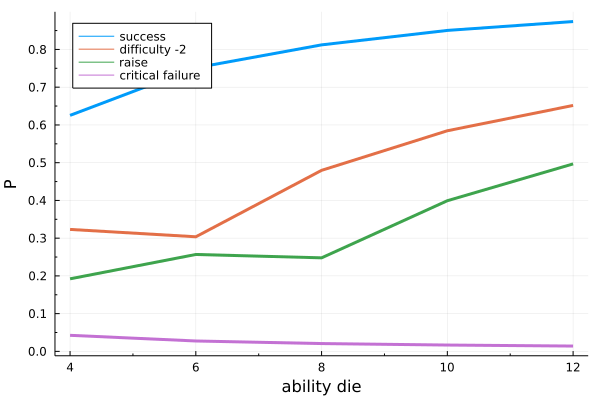

In [11]:
plot([4,6,8,10,12],psuccess,lw=3,
label="success",xlabel="ability die",ylabel="P",legend=:topleft,
yticks=(0.:0.1:1.0),minorticks=2)
plot!([4,6,8,10,12],psuccessminustwo,label="difficulty -2",lw=3)
plot!([4,6,8,10,12],raise,label="raise",lw=3)
plot!([4,6,8,10,12],critical,label="critical failure",lw=3)
